In [89]:
import random
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

## Q1

In [52]:
sample_size = 1000
data = {
    'y': [],
    'x': []
}

for n in range(sample_size):
    data['x'].append(random.uniform(1,100))
    data['y'].append(5+.2*np.log(data['x'][n]) + random.normalvariate(0, 1))

In [53]:
df = pd.DataFrame(data)

In [54]:
df['x2'] = df.x**2
df['log x'] = df.x.apply(np.log)

In [55]:
df.head()

,x,y,x2,log x
0,8.652031,5.839648,74.857635,2.157794
1,1.575065,4.654537,2.480831,0.454297
2,47.750426,4.647505,2280.103156,3.865988
3,48.272554,6.284484,2330.239497,3.876863
4,16.575238,6.666136,274.738515,2.807910


In [56]:
X1 = df.loc[:,['x', 'x2']]
X2 = df.loc[:,['log x']]
y = df.y

In [57]:
lr_model1 = LinearRegression()
lr_model2 = LinearRegression()

In [58]:
lr_model1.fit(X1, y)
lr_model2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
print(lr_model1.intercept_,  lr_model1.coef_)
print(lr_model2.intercept_,  lr_model2.coef_)

(5.2345926387357933, array([  1.26116686e-02,  -6.15359725e-05]))
(4.8850957217040696, array([ 0.2141049]))


/Users/mrapp/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


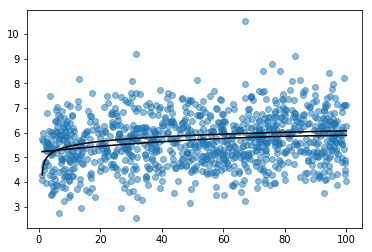

In [67]:
lr_predict1 = lr_model1.predict(X1)
lr_predict2 = lr_model2.predict(X2)

plt.scatter(df.x, df.y, alpha=.50)
plt.plot(np.linspace(1,100,1000), 5.23 + 0.0126*np.linspace(0,100,1000) - 0.00006*np.linspace(0,100,1000)**2, color = 'k');
plt.plot(np.linspace(1,100,1000), 4.88 + 0.26*np.log(np.linspace(0,100,1000)), color = 'k');

## Q2

In [165]:
sample_size = 200
data = {
    'y': [],
    'x': []
}

for n in range(sample_size):
    data['x'].append(random.uniform(1,10))
    data['y'].append(5+ 2 * data['x'][n] - 0.5 *data['x'][n]**2 + random.normalvariate(0, 5))

In [166]:
df2 = pd.DataFrame(data)
df2['x2'] = df2.x**2

In [167]:
X = df2.loc[:,['x', 'x2']]
y = df2.y 

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [169]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
print(mean_squared_error(y_train, lr_model.predict(X_train)))
print(mean_squared_error(y_test, lr_model.predict(X_test)))


24.4042916831
32.3203822831


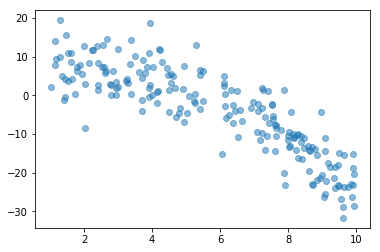

In [171]:
plt.scatter(df2.x, df2.y, alpha=.50)

In [194]:
k_max = 8
for n in range(k_max):
    df2['x'+ str(n)] = df2.x**n

In [195]:
df2.head()

,x,y,x2,x0,x1,x3,x4,x5,x6,x7,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,1.940979,5.434375,3.767400,1.0,1.940979,7.312446,14.193305,27.548910,53.471862,1.037878e+02,...,5.759936e+05,1.117992e+06,2.169999e+06,4.211922e+06,8.175254e+06,1.586800e+07,3.079945e+07,5.978110e+07,1.160339e+08,2.252193e+08
1,4.026996,7.272862,16.216700,1.0,4.026996,65.304595,262.981372,1059.025053,4264.690131,1.717389e+04,...,1.257839e+12,5.065312e+12,2.039799e+13,8.214264e+13,3.307881e+14,1.332083e+15,5.364292e+15,2.160199e+16,8.699112e+16,3.503129e+17
2,6.317310,1.338315,39.908409,1.0,6.317310,252.113801,1592.681102,10061.460667,63561.368701,4.015369e+05,...,1.024812e+16,6.474054e+16,4.089861e+17,2.583692e+18,1.632198e+19,1.031110e+20,6.513844e+20,4.114998e+21,2.599572e+22,1.642230e+23
3,4.903372,1.570028,24.043062,1.0,4.903372,117.892086,578.068809,2834.486681,13898.543949,6.814974e+04,...,6.455021e+13,3.165137e+14,1.551985e+15,7.609959e+15,3.731446e+16,1.829667e+17,8.971540e+17,4.399080e+18,2.157033e+19,1.057674e+20
4,8.378021,-10.601133,70.191237,1.0,8.378021,588.063668,4926.809818,41276.916584,345818.877882,2.897278e+06,...,2.902879e+18,2.432038e+19,2.037567e+20,1.707078e+21,1.430193e+22,1.198219e+23,1.003870e+24,8.410448e+24,7.046291e+25,5.903398e+26


In [196]:
y = df2.y
xs = ['x'+str(i) for i in range(k_max)]
lr_model = LinearRegression()
metrics = {
    'train error': [],
    'test error': [],
    'R**2': [],
    'AIC': []
}
for i in range(k_max):
    X = df2.loc[:,xs[:i+1]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
    lr_model.fit(X_train, y_train)
    metrics['train error'].append(mean_squared_error(y_train, lr_model.predict(X_train)))
    metrics['test error'].append(mean_squared_error(y_test, lr_model.predict(X_test)))
    metrics['R**2'].append(lr_model.score(X_test, y_test))
    metrics['AIC'].append(2*i + 2*(len(X)*np.log(metrics['train error'][-1])))

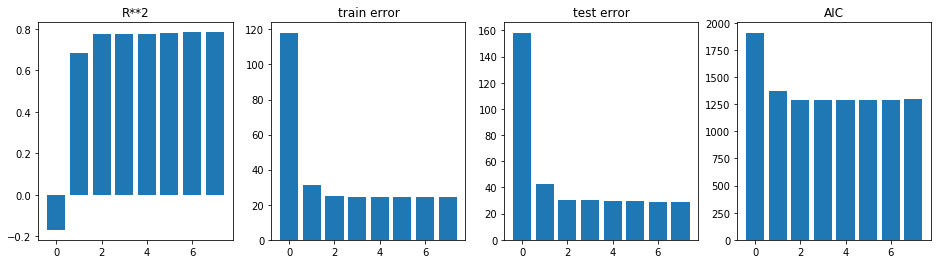

In [197]:
plt.figure(figsize=(16,4))
for i, key in enumerate(metrics):
    plt.subplot(1,4,i+1)
    plt.bar(range(k_max), metrics[key])
    plt.title(key)
    

In [218]:
errors={
    'train':[],
    'test':[]
}
X = df2.loc[:,['x','x2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
n=0
y = df2.y
while n < len(X):
    n+=5
    lr_model.fit(X_train[:n],y_train[:n])
    errors['train'].append(mean_squared_error(y_train[:n], lr_model.predict(X_train[:n])))
    errors['test'].append(mean_squared_error(y_test, lr_model.predict(X_test)))
    
    
    

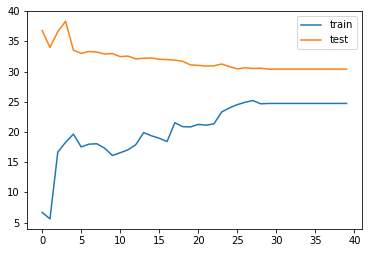

In [225]:
plt.plot(errors['train'], label= 'train')
plt.plot(errors['test'], label= 'test')
plt.legend()
